<a href="https://colab.research.google.com/github/wenchunx/BEAT_SABER/blob/main/Architects_Generation_CNN_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Model Description
### Build a simple feed-forward deep NN that could generate architects' building. The model could be enhanced by using CNNs or architectures like LeNet, AlexNet, VGG, ResNet... and of course by building a great dataset of different architects' designs.
### Dataset: https://www.kaggle.com/datasets/galaxyarchitects/architects-dataset

# 1. Import Libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Reshape, Dropout, Dense
from tensorflow.keras.layers import Flatten, BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import LeakyReLU , ReLU, PReLU
from tensorflow.keras.layers import Conv2D ,Conv2DTranspose
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.optimizers import Adam
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt


In [ ]:
# 下載資料並解壓縮
!pip install --upgrade --no-cache-dir gdown --pre
!gdown --id 1npRHIzJdeHqmlnBELqH3NrZnNBH2aTOr

#https://drive.google.com/file/d/1npRHIzJdeHqmlnBELqH3NrZnNBH2aTOr/view?usp=sharing

  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (uriginal): https://drive.google.com/uc?id=1npRHIzJdeHqmlnBELqH3NrZnNBH2aTOr
From (redirected): https://drive.google.com/uc?id=1npRHIzJdeHqmlnBELqH3NrZnNBH2aTOr&confirm=t&uuid=fb02842c-080c-4169-acaa-ea5103a5e65b
To: /content/archive.zip
100% 688M/688M [00:05<00:00, 116MB/s]


In [ ]:
!unzip -d 010/ /content/archive.zip


Archive:  /content/archive.zip
  inflating: 010/Alvaro Siza/1 (1).jpg  
  inflating: 010/Alvaro Siza/1 (10).jpg  
  inflating: 010/Alvaro Siza/1 (11).jpg  
  inflating: 010/Alvaro Siza/1 (12).jpg  
  inflating: 010/Alvaro Siza/1 (13).jpg  
  inflating: 010/Alvaro Siza/1 (14).jpg  
  inflating: 010/Alvaro Siza/1 (15).jpg  
  inflating: 010/Alvaro Siza/1 (16).jpg  
  inflating: 010/Alvaro Siza/1 (17).jpg  
  inflating: 010/Alvaro Siza/1 (18).jpg  
  inflating: 010/Alvaro Siza/1 (19).jpg  
  inflating: 010/Alvaro Siza/1 (2).jpg  
  inflating: 010/Alvaro Siza/1 (20).jpg  
  inflating: 010/Alvaro Siza/1 (21).jpg  
  inflating: 010/Alvaro Siza/1 (22).jpg  
  inflating: 010/Alvaro Siza/1 (23).jpg  
  inflating: 010/Alvaro Siza/1 (24).jpg  
  inflating: 010/Alvaro Siza/1 (25).jpg  
  inflating: 010/Alvaro Siza/1 (26).jpg  
  inflating: 010/Alvaro Siza/1 (27).jpg  
  inflating: 010/Alvaro Siza/1 (28).jpg  
  inflating: 010/Alvaro Siza/1 (29).jpg  
  inflating: 010/Alvaro Siza/1 (3).jpg  
  infl

### 1.1 Switch to TensorFlow GPU

In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Limit GPU memory growth
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

Num GPUs Available:  1


### 2. Loading Dataset

In [ ]:
dataset = '/content/010'

In [ ]:
os.listdir(dataset)

['Santiago Calatrava',
 'Alvaro Siza',
 'Richard Meier',
 'Frank Gehry',
 'I M Pei',
 'Bjarke Ingels',
 'Peter Eisenman',
 'Mies van der Rohe',
 'Gordon Bunshaft',
 'Renzo Piano',
 'Eero Saarinen',
 'Toyo Ito',
 'Antonio Gaudi',
 'Oscar Niemeyer',
 'Le Corbusier',
 'Daniel Libeskind',
 'Norman Foster',
 'Michael Graves',
 'Bernard Tschumi',
 'Kenzo Tange',
 'Tadao Ando',
 'Philip Johnson',
 'Rem Koolhaas',
 'Zaha Hadid',
 'Jean Nouvel']

In [ ]:
os.path.isdir('/content/010/Alvaro Siza/fhghgghf')

subfolders = []

subfolders.append('/content/010/Alvaro Siza/fhghgghf')

In [ ]:
def listdirs(dataset):
    subfolders = []
    for file in os.listdir(dataset):
        d = os.path.join(dataset, file)
        if os.path.isdir(d):
            subfolders.append(d) #(d.replace("\\", "/"))
            subfolders.extend(listdirs(d))
    return subfolders

subfolders_list = listdirs(dataset)
#remove = str.maketrans('', '', "[]'")
#subfolders_list = subfolders_list.translate(remove)
print(subfolders_list)

['/content/010/Santiago Calatrava', '/content/010/Alvaro Siza', '/content/010/Richard Meier', '/content/010/Frank Gehry', '/content/010/I M Pei', '/content/010/Bjarke Ingels', '/content/010/Peter Eisenman', '/content/010/Mies van der Rohe', '/content/010/Gordon Bunshaft', '/content/010/Renzo Piano', '/content/010/Eero Saarinen', '/content/010/Toyo Ito', '/content/010/Antonio Gaudi', '/content/010/Oscar Niemeyer', '/content/010/Le Corbusier', '/content/010/Daniel Libeskind', '/content/010/Norman Foster', '/content/010/Michael Graves', '/content/010/Bernard Tschumi', '/content/010/Kenzo Tange', '/content/010/Tadao Ando', '/content/010/Philip Johnson', '/content/010/Rem Koolhaas', '/content/010/Zaha Hadid', '/content/010/Jean Nouvel']


# 3. Generating Dataset

In [ ]:
img_height = 64
img_width = 64

batch_size = 32


In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset,
    label_mode=None,
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True
)


Found 2199 files belonging to 1 classes.


In [ ]:
data_iterator = train_ds.as_numpy_iterator()

In [ ]:
#Get another batch from the iterator
batch = data_iterator.next()

#Images represented as numpy arrays
batch.shape

(128, 64, 64, 3)

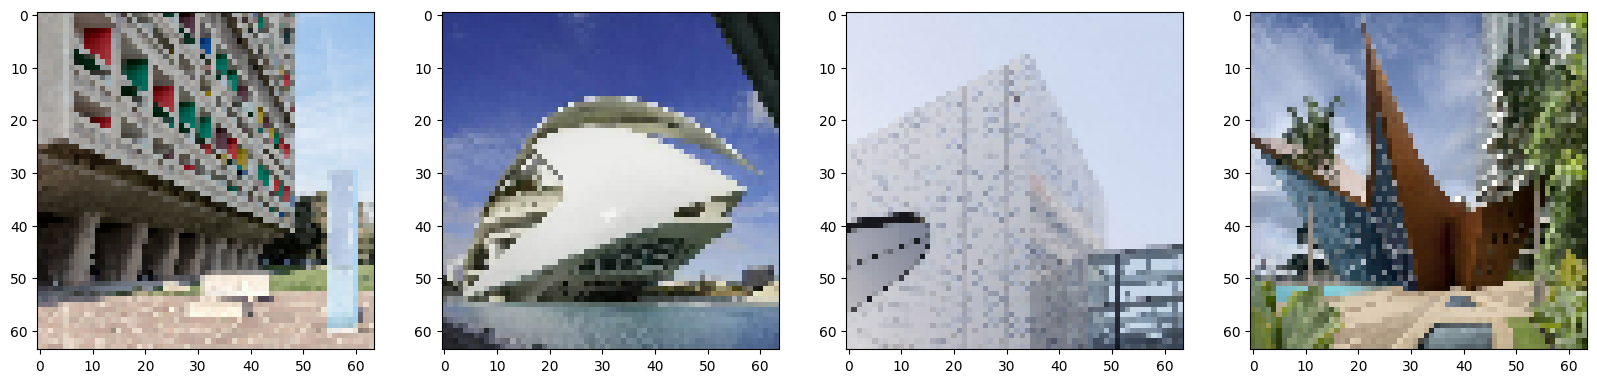

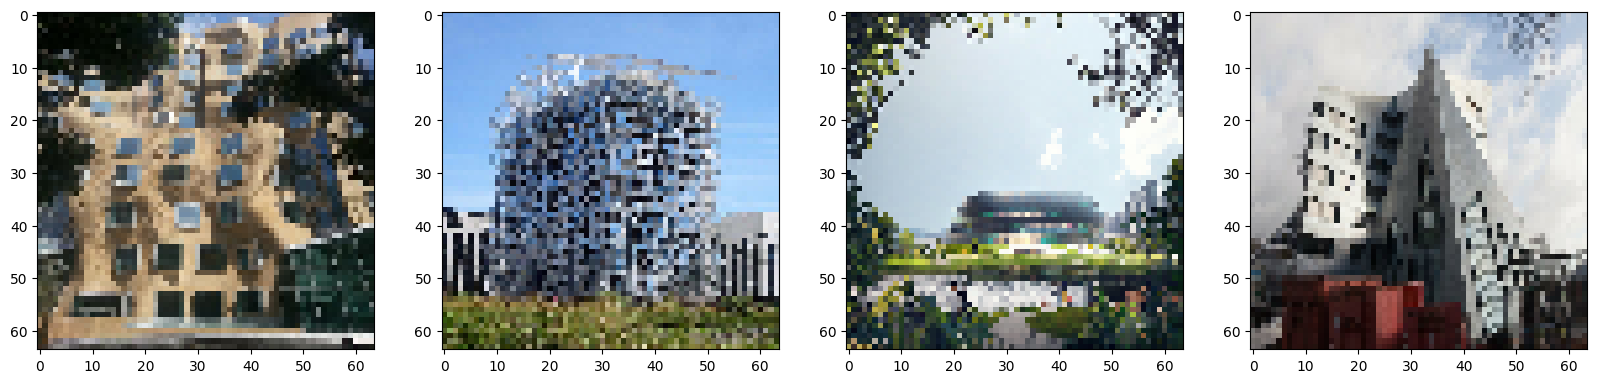

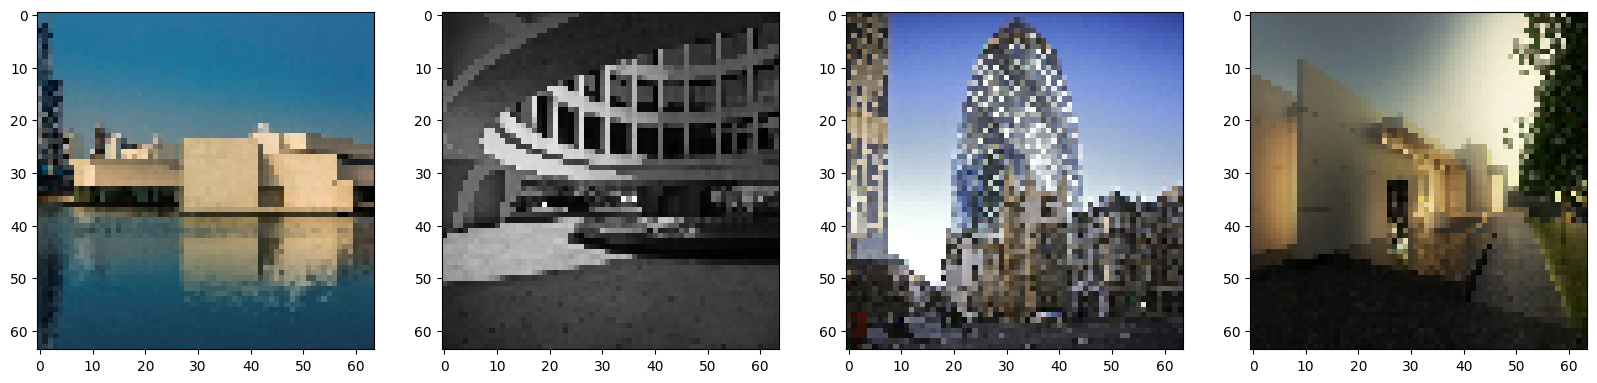

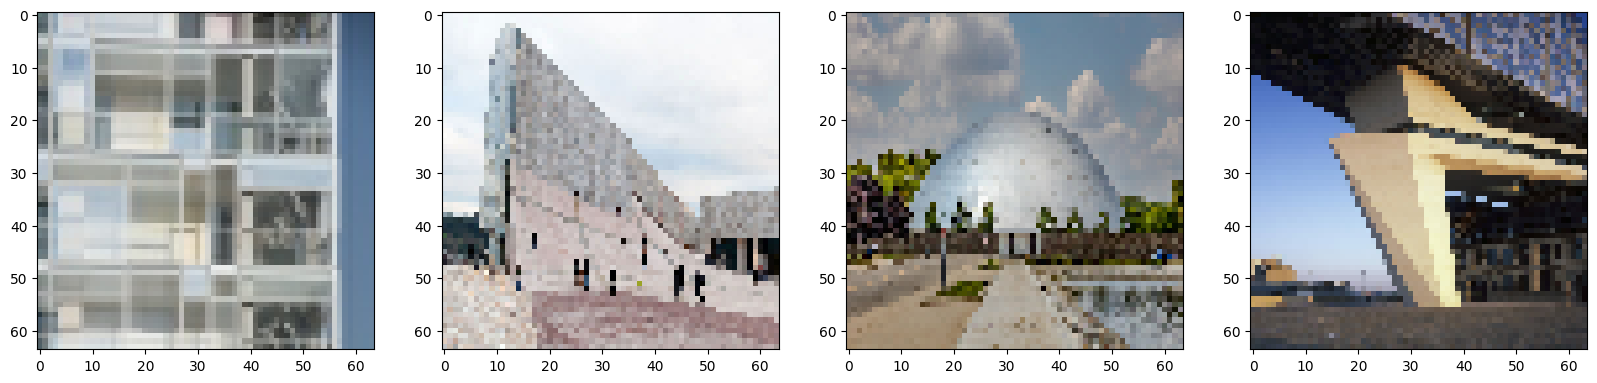

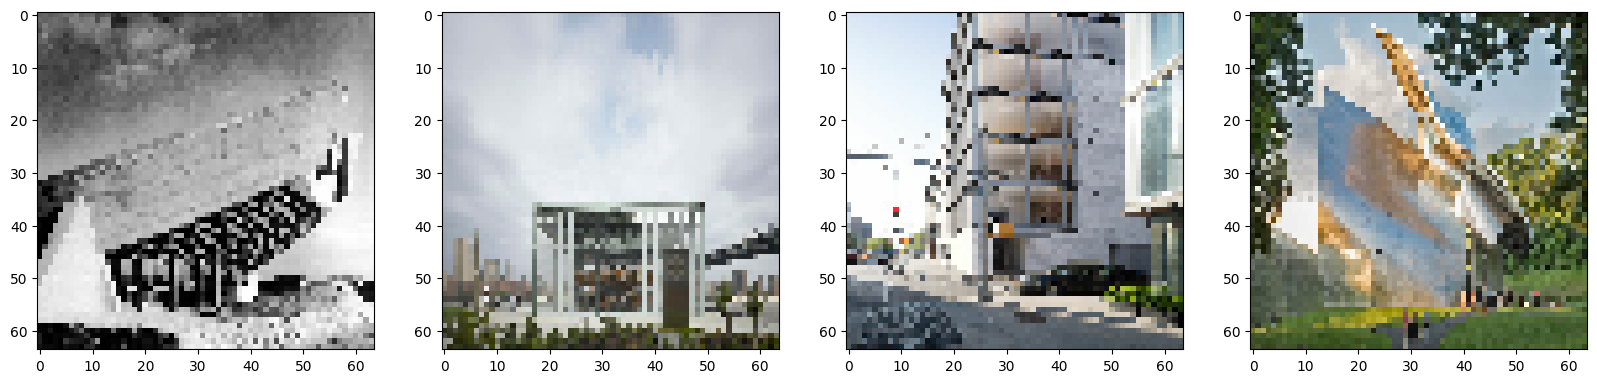

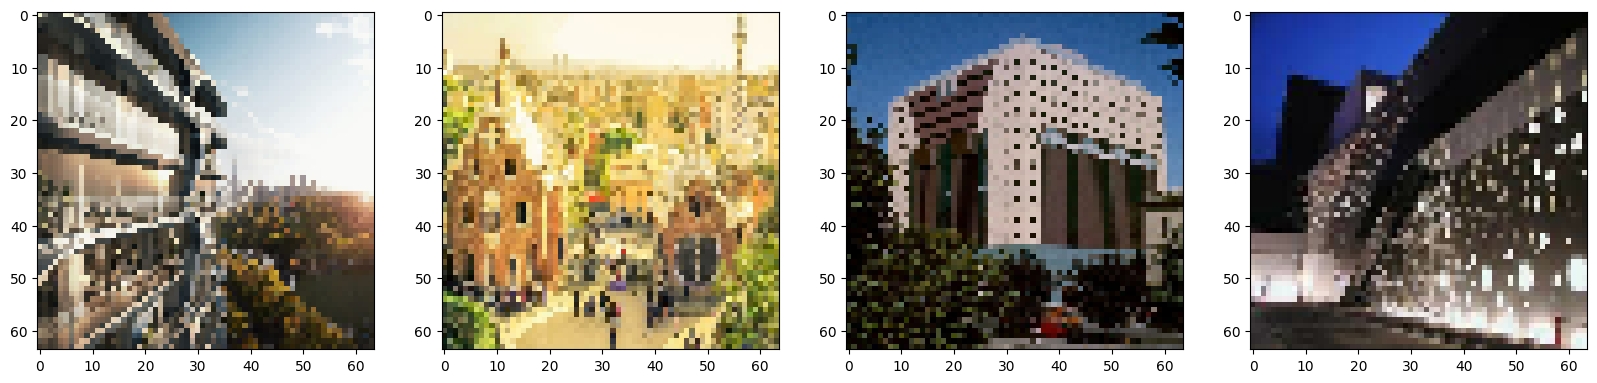

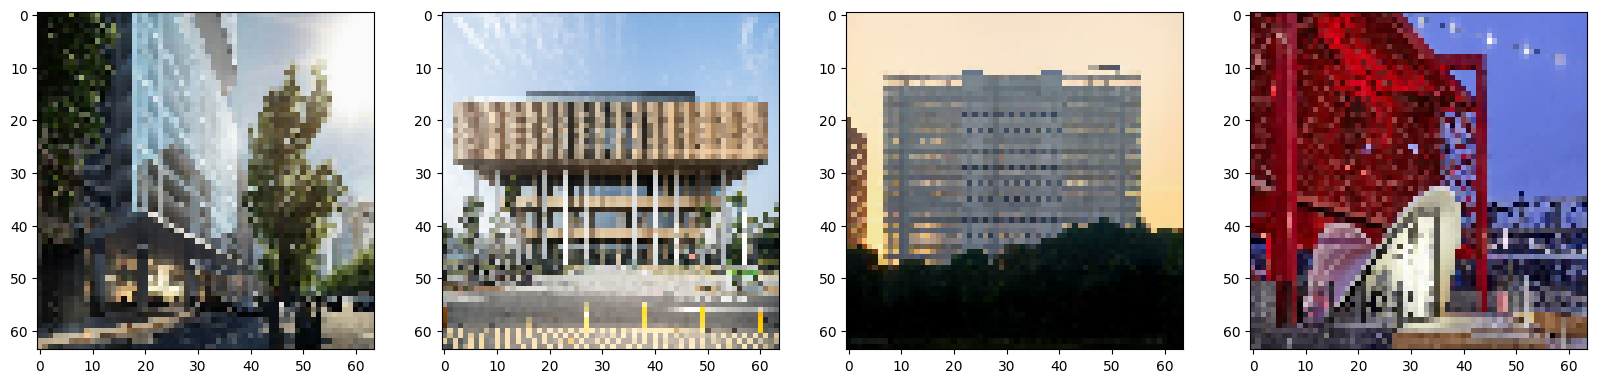

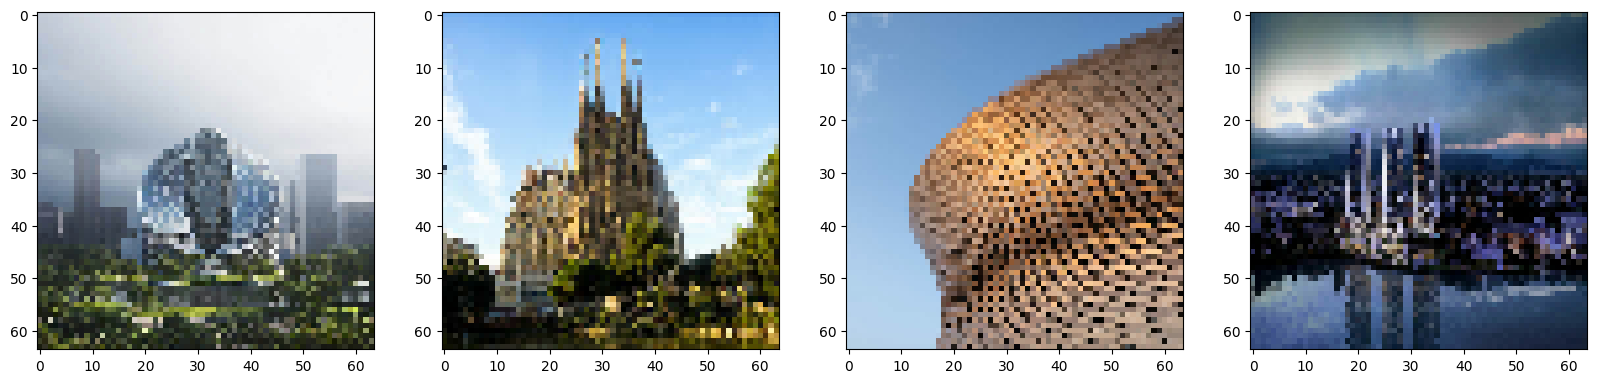

In [ ]:
# plot data from a batch
for j in range(8):

  fig, ax = plt.subplots(ncols=4, figsize=(20,20))
  for idx, img in enumerate(batch[j*4:j*4+4]):
      ax[idx].imshow(img.astype(int))
      #ax[idx].title.set_text(batch[1][idx])

# 4. Preprocessing Data

In [ ]:
train_ds = train_ds.map(lambda x: ((x/127.5)-1))

# 5. Deep Learning Model (DCGAN)

In [ ]:
# Weights initializer
init = tf.keras.initializers.RandomNormal(stddev=0.02)

In [ ]:
def build_generator(seed_size):
    """
    Builds the generator model

    Parameters:
        seed_size: size of the random vector fed into the generator

    Returns:
        model: keras model representing the generator
    """
    model = Sequential()

    # Block - 1
    model.add(Dense(4*4*1024,kernel_initializer=init,input_dim=seed_size))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Reshape((4,4,1024))) # Resulting shape = (4,4,1024)

    # Block - 2
    model.add(Conv2DTranspose(512,kernel_size=5,strides=2,padding='same',use_bias=False,kernel_initializer=init))
    model.add(BatchNormalization())
    model.add(ReLU())  # Resulting shape = (8,8,512)

    # Block - 3
    model.add(Conv2DTranspose(256,kernel_size=5,strides=2,padding='same',use_bias=False,kernel_initializer=init))
    model.add(BatchNormalization())
    model.add(ReLU()) # Resulting shape = (16,16,256)

    # Block - 4
    model.add(Conv2DTranspose(128,kernel_size=3,strides=2,padding='same',use_bias=False,kernel_initializer=init))
    model.add(BatchNormalization())
    model.add(ReLU()) # Resulting shape = (32,32,128)

    # Block - 5
    model.add(Conv2DTranspose(3,kernel_size=3,strides=2,padding='same',use_bias=False,kernel_initializer=init))
    model.add(Activation('tanh')) # Resulting shape = (64,64,3)

    return model

In [ ]:
def build_discriminator(image_length,image_channels):

    """
    Builds the generator model

    Parameters:
        image_length: length of a side of the square image
        image_channels: number of channels in the image

    Returns:
        model: keras model representing the discriminator
    """

    model = Sequential()

    # Block - 1
    model.add(Conv2D(64,kernel_size=3,strides=2,padding='same',use_bias=False,input_shape=(image_length,image_length,image_channels),kernel_initializer=init))
    model.add(LeakyReLU(alpha=0.2)) # Resulting shape = (32,32,64)

    # Block - 2
    model.add(Conv2D(128,kernel_size=3,strides=2,padding='same',use_bias=False,kernel_initializer=init))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.2)) # Resulting shape = (16,16,128)

    # Block - 3
    model.add(Conv2D(256,kernel_size=5,strides=2,padding='same',use_bias=False,kernel_initializer=init))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.2)) # Resulting shape = (8,8,256)

    # Block - 4
    model.add(Conv2D(512,kernel_size=5,strides=2,padding='same',use_bias=False,kernel_initializer=init))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.2)) # Resulting shape = (4,4,512)

    # Block - 5
    model.add(Conv2D(1,kernel_size=4,strides=1,padding='valid',use_bias=False,kernel_initializer=init))
    model.add(Flatten())
    model.add(Activation('sigmoid'))

    return model

In [ ]:
cross_entropy = tf.keras.losses.BinaryCrossentropy()

In [ ]:
class DCGAN(keras.Model):
    """Subclass of the keras.Model class to define custom training step and loss functions"""


    def __init__(self,seed_size,image_length,image_channels,**kwargs):
        """
        Parameters:
            seed_size: size of the random vector for the generator
            image_length: length of a side of the square image
            image_channels: number of channels in the image
        """
        super(DCGAN,self).__init__(**kwargs)

        self.generator = build_generator(seed_size)
        self.discriminator = build_discriminator(image_length,image_channels)
        self.seed_size = seed_size


   # Train generator to give realistic images and penalize it for giving images being classified as fake by the discriminator
    def generator_loss(self,fake_output):
        """
        Parameters:
            fake_output: Tensor containing the respective discriminator's predictions for the batch of images produced
            by generator (fake iamges).

        Returns:
            cross entropy loss between labels for real images (1's) and the discriminator's estimate
        """

        # The objective is to penalize the generator whenever it produces images which the discriminator classifies as 'fake'
        return cross_entropy(tf.ones_like(fake_output), fake_output)


        # smooth parameter is used to induce one sided label smoothing. It can be tuned accordingly
    def discriminator_loss(self,real_output, fake_output,smooth=0.1):
        """
        Parameters:
            real_output: Tensor containing the respective discriminator's predictions for the batch of images taken from
                        the dataset (real images).
            fake_output: Tensor containing the respective discriminator's predictions for the batch of images produced
                        by generator (fake images).

        Returns:
            total_loss: Loss of the discriminator for misclassifying images
        """
        # label for real image is (1-smooth)
        real_loss = cross_entropy(tf.ones_like(real_output)*(1-smooth), real_output)
        fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
        total_loss = real_loss + fake_loss
        return total_loss

    def compile(self,generator_optimizer,discriminator_optimizer):
        """
        configures model for training by adding optimizers

        Parameters:
            generator_optimizer: keras optimizer to be used to train generator.
            discriminator_optimizer: keras optimizer to be used to train discriminator.
        """
        super(DCGAN, self).compile()
        self.generator_optimizer = generator_optimizer
        self.discriminator_optimizer = discriminator_optimizer

    @tf.function
    def train_step(self,data):

        """
        Takes in training data and does a forward pass

        Parameters:
            data: a batch from the training data.
        Returns:
            gen_loss: loss associated with the generator.
            disc_loss: loss associated with the discriminator.

        """

        batch_size = tf.shape(data)[0]

        # feed a random input to generator
        seed = tf.random.normal(shape=(batch_size,self.seed_size))

        with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:

            # generate image using generator
            generated_image = self.generator(seed, training = True)

            # discriminator's prediction for real image
            real_output = self.discriminator(data,training = True)

            # discriminator's estimate for fake image
            fake_output = self.discriminator(generated_image,training = True)

            # compute loss
            gen_loss = self.generator_loss(fake_output)
            disc_loss = self.discriminator_loss(real_output,fake_output)

            # optimize generator first
            generator_grad = gen_tape.gradient(gen_loss,self.generator.trainable_variables)
            discriminator_grad = disc_tape.gradient(disc_loss,self.discriminator.trainable_variables)

            # optimize discriminator after generator
            self.generator_optimizer.apply_gradients(zip(generator_grad,self.generator.trainable_variables))
            self.discriminator_optimizer.apply_gradients(zip(discriminator_grad,self.discriminator.trainable_variables))

        return {
            "generator loss": gen_loss,
            "discriminator_loss": disc_loss
        }

In [ ]:
# parameters and hyperparameters
image_length = 64
image_channels = 3
batch_size = 128
seed_size = 128

NUM_ROWS = 4
NUM_COLS = 7
MARGIN = 16

fixed_seed = tf.random.normal(shape=(NUM_ROWS * NUM_COLS, seed_size))
# We are defining a fixed seed because we want to see the generator's i

In [ ]:
generator_optimizer = Adam(learning_rate=0.0002,beta_1=0.5)
discriminator_optimizer = Adam(learning_rate=0.0002,beta_1=0.5)

dcgan = DCGAN(seed_size,image_length,image_channels)
dcgan.compile(generator_optimizer,discriminator_optimizer)

# 6. Train the Model

In [ ]:
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
class save_images(keras.callbacks.Callback):
    """
    This is a subclass of the keras.callbacks.Callback class.
    On subclassing it we can specify methods which can be executed while training
    """
    def __init__(self,noise,margin,num_rows,num_cols,**kwargs):
        super(keras.callbacks.Callback,self).__init__(**kwargs)
        self.noise = noise
        self.margin = margin
        self.num_rows = num_rows
        self.num_cols = num_cols

    # overwriting on_epoch_end() helps in executing a custom method when an epoch ends
    def on_epoch_end(self, epoch, logs=None):
        """
        Saves images generated from a fixed random vector by the generator to the disk

        Parameters:
            noise: fixed noise vector from a normal distribution to be fed to the generator.
            num_rows: number of rows of images
            num_cols: number of columns of images
            margin: margin between images
            generator: keras model representing the generator network

        """

        # Generate a base array upon which images can then be added sequentially
        image_array = np.full((
            self.margin + (self.num_rows * (64 + self.margin)),
            self.margin + (self.num_cols * (64 + self.margin)), 3),
            255, dtype=np.uint8)

        # Generate num_rows*num_cols number of images using the generator model
        generated_images = self.model.generator.predict(self.noise)

        # Convert pixel intensities to the range [0,1]
        generated_images = 0.5 * generated_images + 0.5

        #Images need not be converted into the typical [0,255] pixel intensity values because the PIL Image module accepts the range [0,1]


        image_count = 0
        for row in range(self.num_rows):
            for col in range(self.num_cols):
                r = row * (64 + 16) + self.margin
                c = col * (64 + 16) + self.margin
                image_array[r:r + 64, c:c + 64] = generated_images[image_count] * 255
                image_count += 1

        # The image array now contains all the images in an array format which can be stored to the disk

        output_path = 'Epoch_images'
        if not os.path.exists(output_path):
            os.makedirs(output_path)

        filename = os.path.join(output_path, f"train-{epoch+1}.png")
        im = Image.fromarray(image_array)
        im.save(filename)


class checkpoint_callback(keras.callbacks.Callback):
    """
    Subclass of keras.callbacks.Callback to save the weights every epoch in a .h5 file
    """
    def __init__(self,**kwargs):
        super(keras.callbacks.Callback, self).__init__(**kwargs)
    def on_epoch_end(self, epoch, logs=None):
        self.model.generator.save_weights("Weights/generator_weights-test.h5")
        self.model.discriminator.save_weights("Weights/discriminator_weights-test.h5")

In [ ]:
import os

# checking if the directory demo_folder
# exist or not.
if not os.path.exists("Weights"):

    # if the demo_folder directory is not present
    # then create it.
    os.makedirs("Weights")

In [ ]:
with tf.device('/GPU:0'):

    #uncomment the next two lines if not training from scratch
    #dcgan.generator.load_weights("Weights/generator_weights.h5")
    #dcgan.discriminator.load_weights("Weights/discriminator_weights.h5")

    history = dcgan.fit(train_ds,epochs=120,batch_size=batch_size,
                        callbacks=[
                            save_images(noise=fixed_seed,num_rows=NUM_ROWS,num_cols=NUM_COLS,margin=MARGIN),
                            checkpoint_callback()
                        ])

Epoch 1/120
18/18 [==============================] - 27s 872ms/step - generator loss: 9.5285 - discriminator_loss: 1.7531
Epoch 2/120
18/18 [==============================] - 27s 885ms/step - generator loss: 9.8415 - discriminator_loss: 1.7763
Epoch 3/120
18/18 [==============================] - 28s 895ms/step - generator loss: 5.6749 - discriminator_loss: 1.8186
Epoch 4/120
18/18 [==============================] - 27s 873ms/step - generator loss: 8.0754 - discriminator_loss: 1.3772
Epoch 5/120
18/18 [==============================] - 27s 874ms/step - generator loss: 3.3146 - discriminator_loss: 0.9770
Epoch 6/120
18/18 [==============================] - 27s 879ms/step - generator loss: 7.2307 - discriminator_loss: 0.9743
Epoch 7/120
18/18 [==============================] - 27s 872ms/step - generator loss: 2.4825 - discriminator_loss: 0.8599
Epoch 8/120
18/18 [==============================] - 27s 871ms/step - generator loss: 2.7558 - discriminator_loss: 0.5958
Epoch 9/120
18/18 [=====

In [ ]:
dcgan.generator.save("Weights/generator_weights.h5")
dcgan.discriminator.save("Weights/discriminator_weights.h5")

### 6.1. Plot the Model's Performance

# 7. Testing the Model

In [ ]:
dcgan.generator.load_weights("Weights/generator_weights.h5")
dcgan.discriminator.load_weights("Weights/discriminator_weights.h5")

NameError: ignored

In [ ]:
def generate_faces():
    """Generates random Anime faces"""

    # generate 64 images by giving 64 inputs
    noise = tf.random.normal([64,seed_size])
    generated_images = dcgan.generator(noise)

    fig = plt.figure(figsize=(12,12))
    for i in range(generated_images.shape[0]):
        plt.subplot(8,8,i+1)
        # Convert to range [0,1] for plt.imshow()
        plt.imshow((generated_images[i,:,:,:]*0.5+0.5))
        plt.axis("off")
    plt.show()

In [ ]:
generate_faces()

NameError: ignored